<h3> Import the Data </h3>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h3> Check Missing Value </h3>

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h3> Get Correlation in Dataset</h3>

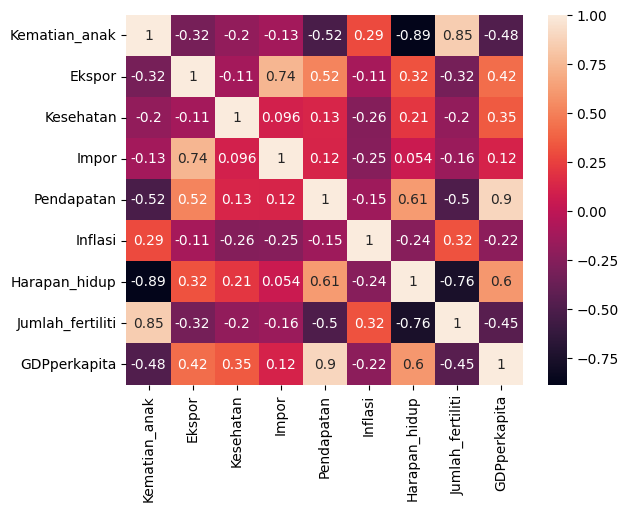

In [3]:
numeric_columns = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.show()

<h3> Check Outlier </h3>

<Figure size 1000x1000 with 0 Axes>

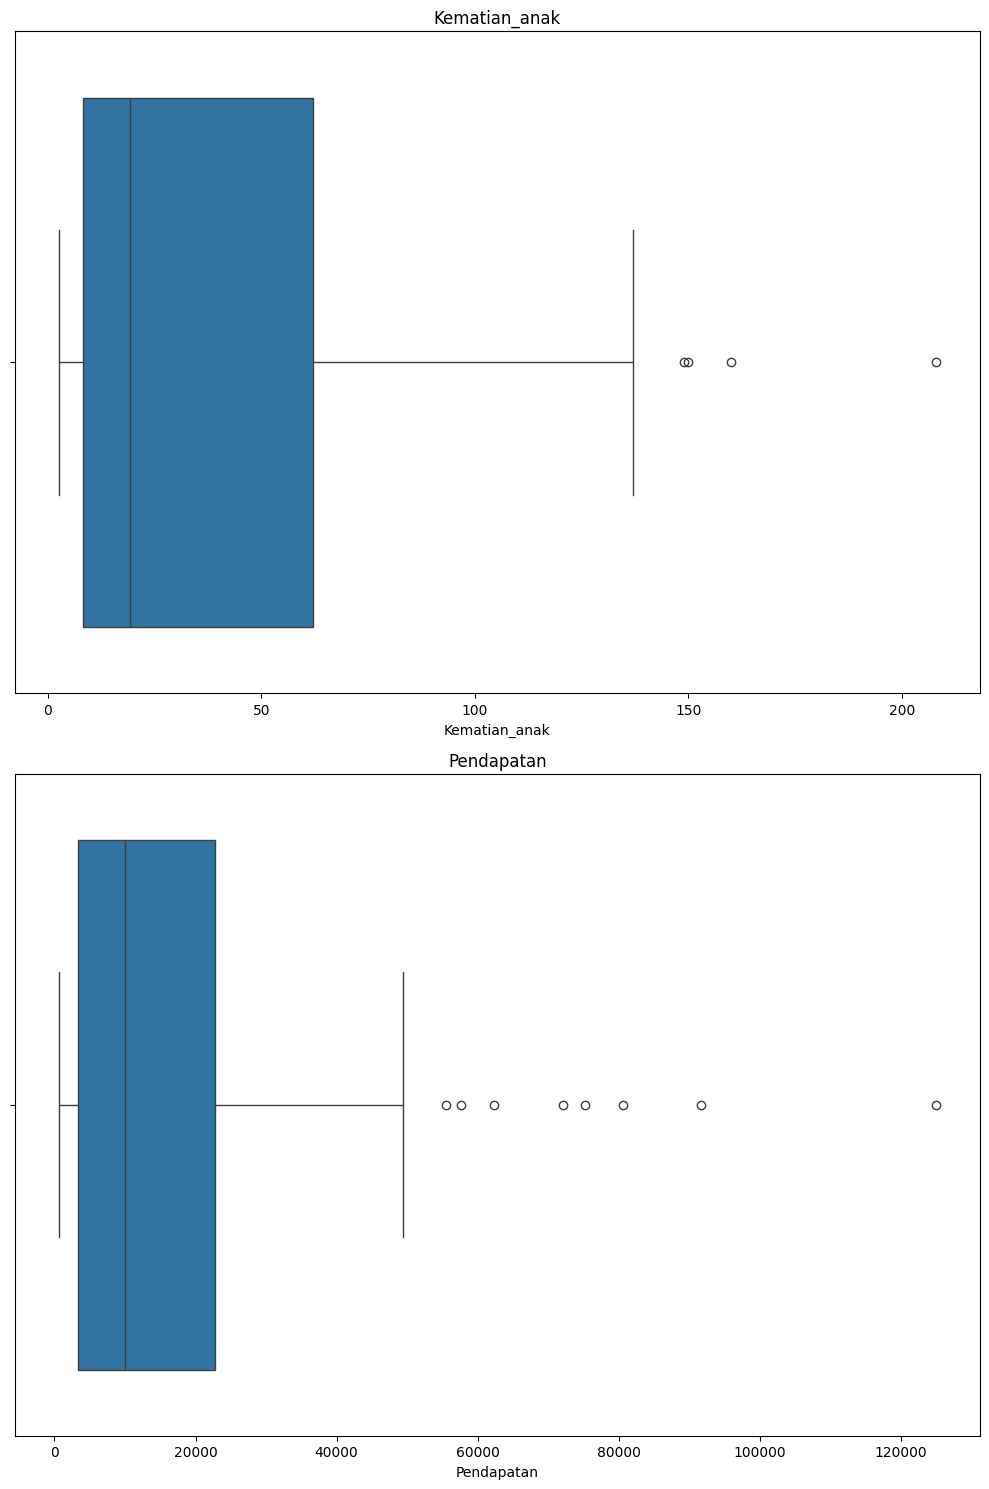

In [4]:
plt.figure(figsize=(10, 10))

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

sns.boxplot(x='Kematian_anak', data=df, ax=axes[0])
sns.boxplot(x='Pendapatan', data=df, ax=axes[1])

axes[0].set_title('Kematian_anak')
axes[1].set_title('Pendapatan')

plt.tight_layout()
plt.show()

<h3>Handling Outlier</h3>

In [5]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df > lower_bound) & (df < upper_bound)]
    return df

In [6]:
df_outlier = remove_outlier(df[['Kematian_anak','Pendapatan']])
df_outlier.dropna(axis=0,inplace=True)

<Figure size 1000x1000 with 0 Axes>

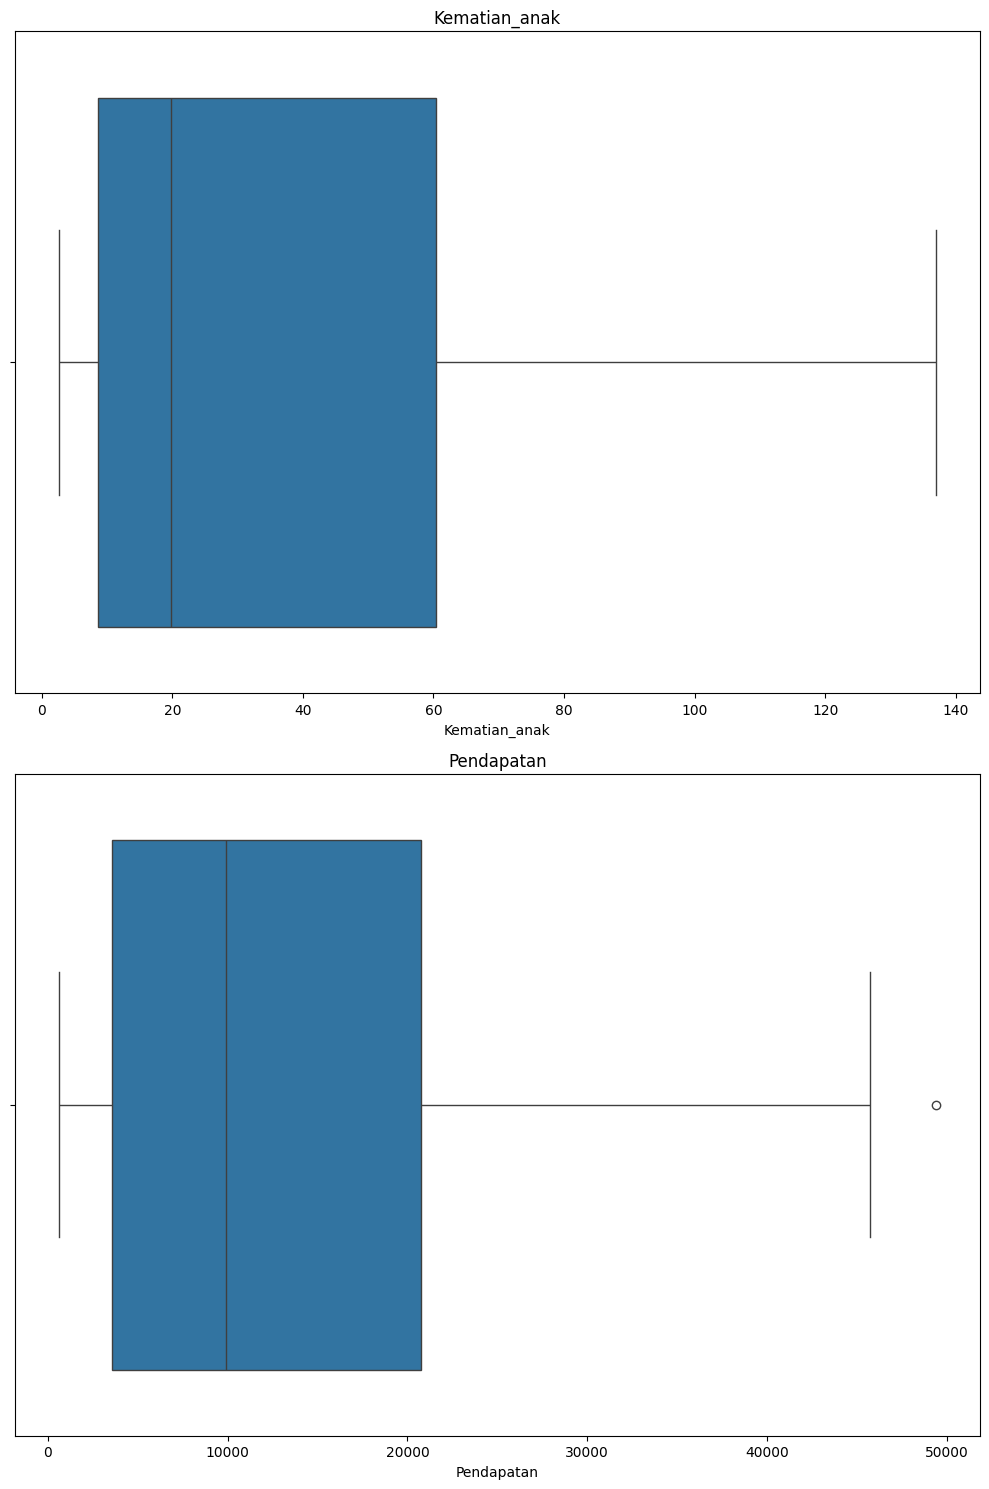

In [7]:
plt.figure(figsize=(10, 10))

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

sns.boxplot(x='Kematian_anak', data=df_outlier, ax=axes[0])
sns.boxplot(x='Pendapatan', data=df_outlier, ax=axes[1])

axes[0].set_title('Kematian_anak')
axes[1].set_title('Pendapatan')

plt.tight_layout()
plt.show()

<h3> Scaling Method</h3>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sc = StandardScaler()
df_outlierScaled = sc.fit_transform(df_outlier.astype(float))

<h3> Set Cluster Value using Elbow Method</h3>

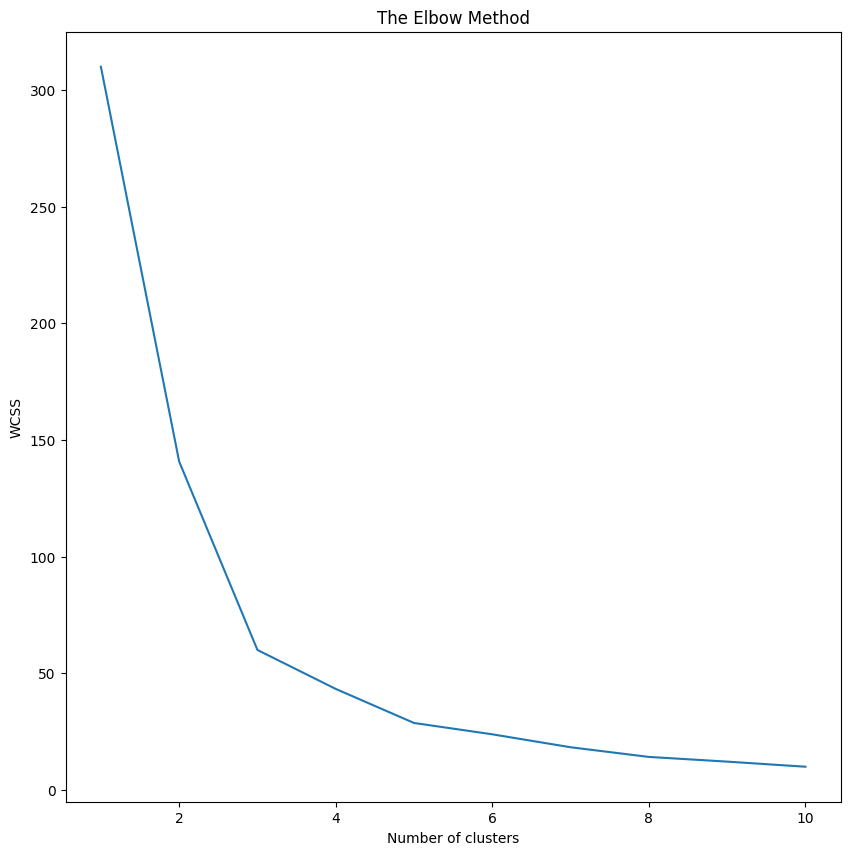

In [9]:
plt.figure(figsize=(10, 10))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_outlierScaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h3> Clustering dataset using Kmeans</h3>

In [10]:
kmeans1 = KMeans(n_clusters=3, random_state=42).fit(df_outlierScaled)
labels1 = kmeans1.labels_

In [11]:
new_df = pd.DataFrame(data=df_outlierScaled, columns=['Kematian_anak', 'Pendapatan'])
new_df['label'] = labels1

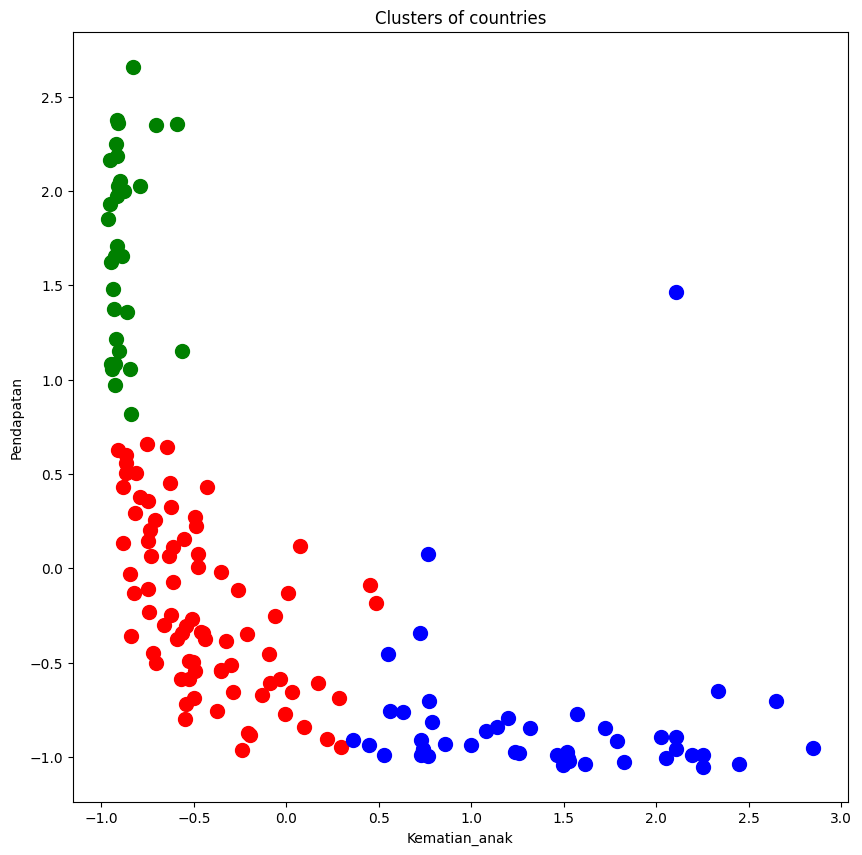

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(new_df.Kematian_anak[new_df.label == 0], new_df.Pendapatan[new_df.label == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(new_df.Kematian_anak[new_df.label == 1], new_df.Pendapatan[new_df.label == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new_df.Kematian_anak[new_df.label == 2], new_df.Pendapatan[new_df.label == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of countries')
plt.xlabel('Kematian_anak')
plt.ylabel('Pendapatan')
plt.show()

<h3> Show Which Cluster to choose </h3>

In [13]:
new_df = new_df.merge(df['Negara'], left_index=True, right_index=True)

In [14]:
blue_cluster = new_df[new_df['label'] == 1][['Negara', 'Pendapatan', 'Kematian_anak']]
print(blue_cluster)

                    Negara  Pendapatan  Kematian_anak
0              Afghanistan   -0.975316       1.519064
3                   Angola   -0.649103       2.335170
12              Bangladesh   -0.912203       0.362915
17                   Benin   -0.959348       2.108474
24                Bulgaria   -0.989004       2.250159
25            Burkina Faso   -1.039647       1.615410
27                Cambodia   -0.895474       2.023463
33                   Chile   -0.990524       1.462390
34                   China   -1.051433       2.250159
35                Colombia   -0.703092       0.773801
37        Congo, Dem. Rep.   -0.893193       2.108474
46                 Ecuador    1.464820       2.108474
47                   Egypt   -0.989764       0.527269
52                    Fiji    0.073281       0.768134
53                 Finland   -0.971514       1.238528
56                  Gambia   -0.865058       1.079841
60                  Greece   -1.007253       2.051800
61                 Grenada  

In [15]:
copy_new_df = new_df.copy()

In [16]:
merged_df = copy_new_df.merge(df, on='Negara')
blue_cluster_merged = merged_df[merged_df['label'] == 1]
blue_cluster_merged_sorted = blue_cluster_merged.sort_values(by='Pendapatan_y', ascending=True)
print(blue_cluster_merged_sorted[['Negara', 'label', 'Pendapatan_y', 'Kematian_anak_y']])

                    Negara  label  Pendapatan_y  Kematian_anak_y
37        Congo, Dem. Rep.      1           609            116.0
88                 Liberia      1           700             89.3
106             Mozambique      1           918            101.0
132           Sierra Leone      1          1220            160.0
93              Madagascar      1          1390             62.2
25            Burkina Faso      1          1430            116.0
0              Afghanistan      1          1610             90.2
56                  Gambia      1          1660             80.3
136        Solomon Islands      1          1780             28.1
17                   Benin      1          1820            111.0
109                  Nepal      1          1990             47.0
87                 Lesotho      1          2380             99.7
12              Bangladesh      1          2440             49.4
27                Cambodia      1          2520             44.4
83         Kyrgyz Republi

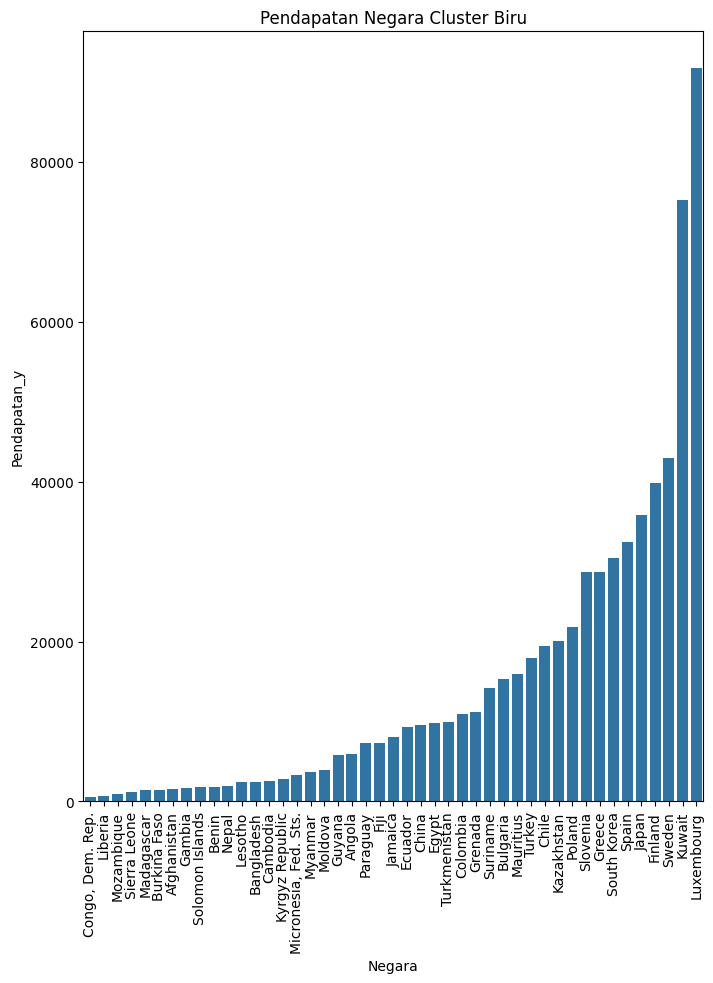

In [17]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Negara', y='Pendapatan_y', data=blue_cluster_merged_sorted)
plt.title('Pendapatan Negara Cluster Biru')
plt.xticks(rotation=90)
plt.show()